In [ ]:
! conda install nltk

In [1]:
import nltk

In [2]:
pwd

'C:\\Users\\Dell'

In [3]:
messages = [line.rstrip() for line in open ('SMSSpamcollection')]

In [4]:
print (len(messages))

5574


In [6]:
for num, message in enumerate(messages[:10]):
    print (num,message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 1

In [7]:
import pandas

In [8]:
messages = pandas.read_csv('SMSSpamcollection',
                           sep='\t', names = ['lables','message'])

In [10]:
messages.head()
print('/n')

/n


In [9]:
messages.describe()

,lables,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
lables     5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [12]:
messages.groupby('lables').describe()

message                                                               
         count unique                                                top freq
lables                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [14]:
messages['length'] = messages['message'].apply(len)
messages.head()

,lables,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

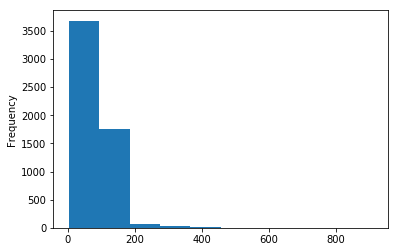

In [16]:
messages['length'].plot(bins=10,kind='hist')

In [17]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [18]:
# Here we are trying to identify the sentence who's length is 910. Called the message
messages[messages['length']==910]

,lables,message,length
1085,ham,For me the love should start with attraction.i...,910


In [19]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BA8FB38>,
      dtype=object)

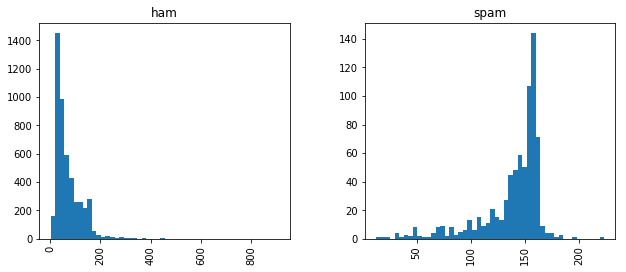

In [20]:
messages.hist(column='length', by ='lables',bins=50,figsize=(10,4))

In [21]:
# Part 3

import string

In [22]:
mess = 'Sample message! Notice: it has punctuation'

In [23]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
nopunc = [char for char in mess if char not in string.punctuation]

In [25]:
nopunc = ''.join(nopunc)

In [26]:
nopunc

'Sample message Notice it has punctuation'

In [27]:
from nltk.corpus import stopwords

In [28]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [29]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [30]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [31]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [32]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [33]:
messages.head()

,lables,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [34]:
# Tokenization - Process of converting normal text strings into tokens (which are the words we actually want)

messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [35]:
# Part 4 Vectorization

from sklearn.feature_extraction.text import CountVectorizer

In [36]:
bow_transformer = CountVectorizer(analyzer=text_process)

In [37]:
bow_transformer.fit(messages['message'])

CountVectorizer(analyzer=<function text_process at 0x000000000B8A26A8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [42]:
message4 = messages['message'][3]

In [43]:
print(message4)

U dun say so early hor... U c already then say...


In [44]:
bow4 = bow_transformer.transform([message4])

In [45]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [46]:
print(bow_transformer.get_feature_names()[4068])

U


In [47]:
messages_bow = bow_transformer.transform(messages['message'])

In [48]:
print ('Shape of Sparse Matrix: ', messages_bow.shape)
print ('Amount of Non-Zero occurences: ', messages_bow.nnz)
print ('sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548
sparsity: 0.08%


In [49]:
# Part 4

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [50]:
tfidf4 = tfidf_transformer.transform(bow4)

In [51]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [52]:
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])

3.2800524267409408


In [53]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [54]:
print(messages_tfidf.shape)

(5572, 11425)


In [55]:
from sklearn.naive_bayes import MultinomialNB

In [57]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['lables'])

In [58]:
print('Predicted:',spam_detect_model.predict(tfidf4)[0])
print('Expected:',messages['lables'][3])

Predicted: ham
Expected: ham


In [59]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [77]:
from sklearn.metrics import classification_report
print(classification_report(messages['lables'], all_predictions))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



In [86]:
from sklearn.cross_validation import train_test_split

msg_train,msg_tst,label_train,label_test = \
train_test_split(messages['message'],messages['lables'],test_size=0.2)

In [87]:
print (len(msg_train), len(msg_tst), len(msg_train) + len(msg_tst))

4457 1115 5572


In [88]:
# Create data pipeline - Check the documentation and click on pipeline link

from sklearn.pipeline import Pipeline

In [89]:
pipeline = Pipeline([('bow',CountVectorizer(analyzer=text_process)),
                     ('tdidf',TfidfTransformer()),
                     ('classifier',MultinomialNB())])

In [90]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000000B8A26A8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [91]:
predictions = pipeline.predict(msg_tst)

In [94]:
print(classification_report(predictions,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.96      0.98      1022
       spam       0.72      1.00      0.84        93

avg / total       0.98      0.97      0.97      1115

